# Lending Club Case Study - Exploratory Data Analysis

### Exploratory Data Analysis Using Python 

In [264]:
""" Lending Club Case Study using EDA.

Python program to study on making decision for load approval based on the
applicant's profile. You will also develop a basic understanding of risk
analytics in banking and financial services and understand how data is used to
minimise the risk of losing money while lending to customers.
"""

" Lending Club Case Study using EDA.\n\nPython program to study on making decision for load approval based on the\napplicant's profile. You will also develop a basic understanding of risk\nanalytics in banking and financial services and understand how data is used to\nminimise the risk of losing money while lending to customers.\n"

In [265]:
# Import required libraries

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
# list content of directory assuming you're currently in the source code dir.

print(os.listdir('./'))

['loan.csv', 'Data_Dictionary.xlsx', 'ravi_boodher.ipynb', '.ipynb_checkpoints', 'loan_CaseStudy.ipynb', 'lending_club.py']


In [267]:
# Load the data into dataframe.

loan_data = pd.read_csv('loan.csv', encoding='ISO-8859-1', dtype='object')

In [268]:
# Check if the data is loading properly, get some insights.

print(loan_data.shape)


(39717, 111)


In [269]:
print(loan_data.head(3))


        id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501   1296599      5000        5000            4975   36 months   
1  1077430   1314167      2500        2500            2500   60 months   
2  1077175   1313524      2400        2400            2400   36 months   

  int_rate installment grade sub_grade            ...              \
0   10.65%      162.87     B        B2            ...               
1   15.27%       59.83     C        C4            ...               
2   15.96%       84.33     C        C5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
0                NaN                NaN            NaN              NaN   
1                NaN                NaN            NaN              NaN   
2                NaN                NaN            NaN              NaN   

  pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                    0         0             NaN       

In [270]:
print(loan_data.describe())

            id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
count    39717     39717     39717       39717           39717       39717   
unique   39717     39717       885        1041            8205           2   
top     683494    500549     10000       10000            5000   36 months   
freq         1         1      2833        2741            1309       29096   

       int_rate installment  grade sub_grade            ...              \
count     39717       39717  39717     39717            ...               
unique      371       15383      7        35            ...               
top      10.99%      311.11      B        B3            ...               
freq        956          68  12020      2917            ...               

       num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
count                 0.0                0.0            0.0              0.0   
unique                0.0                0.0            0.0              

#### As you can see above, loan data is getting loading into dataframe properly.

In [271]:
# List all the column names.

print(list(loan_data.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [272]:
# count of all the columns

print(len(list(loan_data.columns)))

111


#### There are 111 columns in the dataframe. Which requires cleaning of uncessary data.


### DATA CLEANING

Cleaning the data usually involves some of the following steps. Depends on how much data needs to be cleaned.

1. Fix rows and column data
    Delete unnecessary column with junk data.
    Delete Incorrect rows if any
    Delete summary rows
    Specify column names, if missing.
    Split column into multiple columns, like for Date – split into year, date, month columns.
    Merge columns into single column – ex: Merge First name, Last name column into Full Name column.

2. Fix missing values
    Replace the missing data with ‘median’ value
    Replace the missing data with ‘mean’ value
    Remove missing data rows,  if they don’t mean much value.
    df.isnull().sum(axis=0) –> calculate missing data column wise.
    
3. Standardizing data
    Bring up all data to the same scale. (Normalization)
    Look out for outliers.
    Making all character data, either in lower case or upper case.
    Date in string format to Date format.
4. Fixing invalid values
5. Filter data (like removing duplicates, etc)

In [273]:
# Number of missing values in each columns.

print(loan_data.isnull().sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


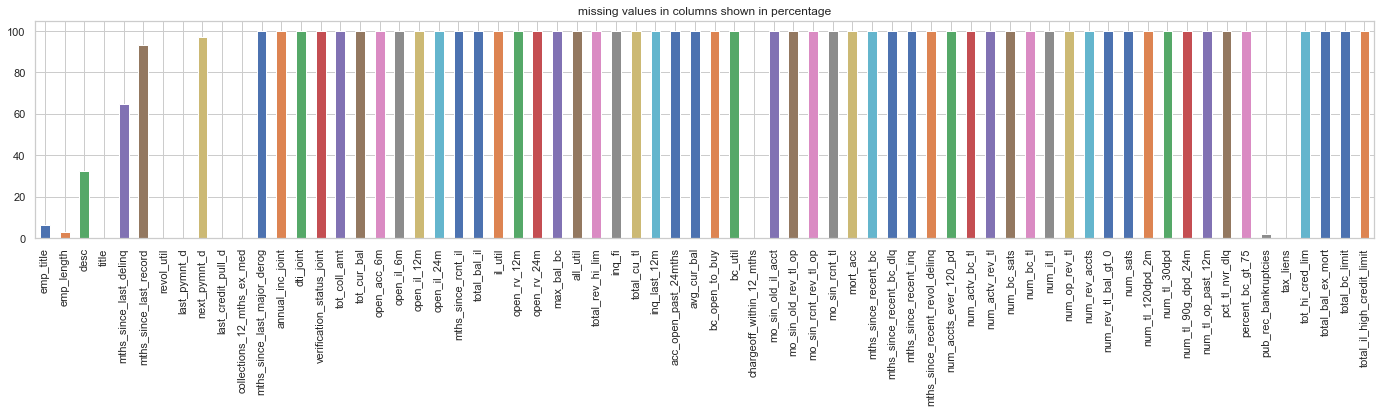

In [274]:
# Missing values in percentage with bar chart visualization.

missing_values = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
missing_values = missing_values.loc[missing_values > 0]
plt.figure(figsize=(24,4))
missing_values.plot(kind='bar')
plt.title('missing values in columns shown in percentage')
plt.show()

#### As the above bar chart shows that there are many columns which are having 100% missing values. It make sense to remove all the columns with more than 50 % of missing values.



In [275]:
# Find out columns which are having more than 50 % missing values.

missing_columns = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) >= 50]
print(len(missing_columns))

57


#### Above list shows that the there are 57 columns with more than 50% missing values.

In [276]:
# Lets drop the columns with missing values to avoid false negative predictions.

loan_data = loan_data.drop(missing_columns, axis=1)
print(loan_data.shape)

(39717, 54)


In [277]:
# Look at the summary of missing values

missing_values = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
missing_values = missing_values[missing_values != 0]
print(missing_values)

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64


In [278]:
# Remove the column 'desc' as it has more than 30% of missing values as 'nan'

loan_data = loan_data.drop('desc', axis=1)

In [279]:
# Remove 'nan' value with self employed, Assuming for 'self-employed' applicants emp-length is 'Not Applicable'

print(loan_data.emp_length.unique())
loan_data.emp_length.fillna('0',inplace=True)
loan_data.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan_data.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [280]:
# Remove unnecessary columns. There are columns which does not contribute much to the analysis.
# Example 'id' columns is a random number assigned to the loan. 'Member_id' column is also random number assigned to the applicant.
# funded_amnt_inv is a behaviaral variable is generated after the loan is approved.
# There are variables such as acc_now_delinq, delinq_amnt, which are having 0 values, can be removed.

columns_not_required = ['title', 'member_id', 'id','url','zip_code', 'delinq_amnt', 'acc_now_delinq', 'application_type' ]
loan_data.drop(labels = columns_not_required, axis =1, inplace=True)
print(loan_data.shape)

(39717, 45)


In [281]:
# standardise few columns with 2 decimanls which are having more than 2 decimals.
# Viz: total_pymnt, total_rec_late_fee, collection_recovery_fee
loan_data['total_pymnt'] = round(loan_data['total_pymnt'].astype(float),2)
print(loan_data['total_pymnt'].head())

0     5863.16
1     1008.71
2     3005.67
3    12231.89
4     3513.33
Name: total_pymnt, dtype: float64


In [282]:
# Round off with 2 decimals for total_rec_late_fee column

loan_data['total_rec_late_fee'] = round(loan_data['total_rec_late_fee'].astype(float), 2)
print(loan_data['collection_recovery_fee'].head())

0       0
1    1.11
2       0
3       0
4       0
Name: collection_recovery_fee, dtype: object


In [283]:
# Round off with 2 decimals for collection_recovery_fee column

loan_data['collection_recovery_fee'] = round(loan_data['collection_recovery_fee'].astype(float), 2)
print(loan_data['collection_recovery_fee'].head())

0    0.00
1    1.11
2    0.00
3    0.00
4    0.00
Name: collection_recovery_fee, dtype: float64


In [284]:
# If there are duplicate rows, it can be dropped as they does not yield any positive outcome

loan_data = loan_data.drop_duplicates()
print(loan_data.shape)

(39717, 45)


In [285]:
# Fix percentage issues in int_rate column

loan_data['int_rate'] = loan_data['int_rate'].replace("%", "", regex=True).astype(float)

In [286]:
# Convert all continous variables to integer type

loan_data['loan_amnt'] = loan_data['loan_amnt'].apply(lambda x: pd.to_numeric(x))
loan_data['funded_amnt_inv'] = loan_data['funded_amnt_inv'].apply(lambda x: pd.to_numeric(x))
loan_data['installment'] = loan_data['installment'].apply(lambda x: pd.to_numeric(x))
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x))
loan_data['annual_inc'] = loan_data['annual_inc'].apply(lambda x: pd.to_numeric(x))
loan_data['dti'] = loan_data['dti'].apply(lambda x: pd.to_numeric(x))

print(loan_data.tail(3))

       loan_amnt funded_amnt  funded_amnt_inv        term  int_rate  \
39714       5000        5000           1325.0   36 months      8.07   
39715       5000        5000            650.0   36 months      7.43   
39716       7500        7500            800.0   36 months     13.75   

       installment grade sub_grade         emp_title emp_length    ...     \
39714       156.84     A        A4               NaN   < 1 year    ...      
39715       155.38     A        A2               NaN   < 1 year    ...      
39716       255.43     E        E2  Evergreen Center   < 1 year    ...      

      recoveries  collection_recovery_fee last_pymnt_d last_pymnt_amnt  \
39714          0                      0.0       Apr-08               0   
39715          0                      0.0       Jan-08               0   
39716          0                      0.0       Jun-10          256.59   

      last_credit_pull_d collections_12_mths_ex_med policy_code  \
39714             Jun-07                  

#### We have cleaned up columns that are not required, data issues, rows, numeric issues, duplicates, decimals, missing values etc. Now we can safely say that we have quality data to do an analysis 

### Univariate Analysis

Once we load data we are good to go for the first type of EDA called as univariate analysis.
“Uni” means one and “Variate” means variable hence univariate analysis means analysis of one
variable or one feature. Univariate basically tells us how data in each feature is distributed
and also tells us about central tendencies like mean, median, and mode.



#### Categorical variables
Descriptive statistics in categorical variables use frequency tables and mode techniques for analysis


In [287]:
# UDF Function to draw plot based on values
def categorical_variable(df, col, hue=None):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
    if len(temp.unique()) > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))
    else:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
    del temp

    plt.show()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


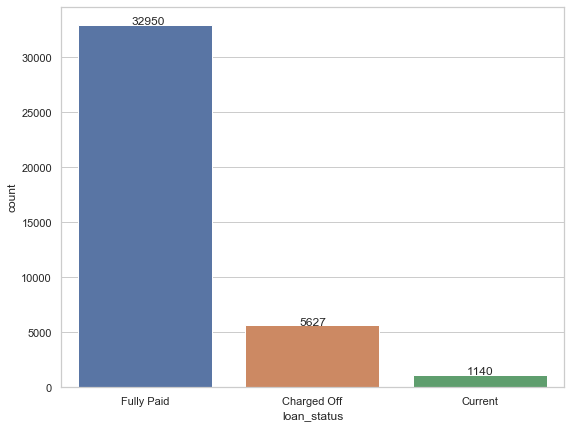

In [288]:
# Loan Status

print(loan_data['loan_status'].value_counts())
categorical_variable(df=loan_data, col='loan_status')

Status of loan show the whether the applicant has fully paid the loan or applicant is in the process of paying the instalments or applicant has not paid the instalments in due time for a long period of time

As you can see there approximetely 14 percentage of the applicants are defauled (charged off)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


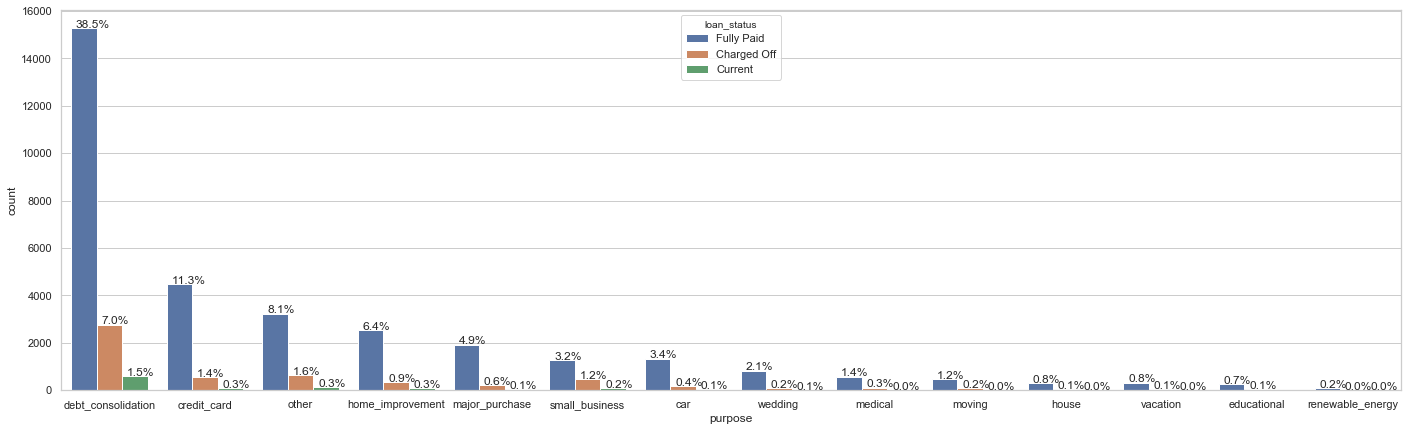

In [289]:
categorical_variable(df=loan_data, col='purpose', hue='loan_status')

Around 47.0 percent of people are Debt Consolidation meaning other loans

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
['RENT' 'OWN' 'MORTGAGE']


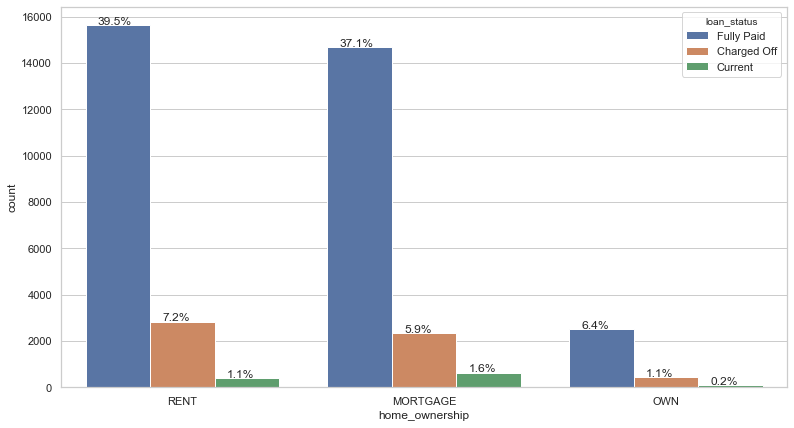

In [290]:
# Ownership
print(loan_data['home_ownership'].value_counts())
print(loan_data['home_ownership'].unique())

#home_ownership with rows 'NONE', 'OTHER' and 'ANY' categories are not necessary, drop it.
rem = ['OTHER', 'NONE', 'ANY']
loan_data.drop(loan_data[loan_data['home_ownership'].isin(rem)].index,inplace=True)
print(loan_data['home_ownership'].unique())
categorical_variable(df=loan_data,col='home_ownership', hue='loan_status')

47.80 percentage people are living in rented house

44.6 percentage of people are under mortagage

7.7 percentage of people living in their own houses

  issue_d issue_month issue_year
0  Dec-11         Dec         11
1  Dec-11         Dec         11
2  Dec-11         Dec         11
3  Dec-11         Dec         11
4  Dec-11         Dec         11


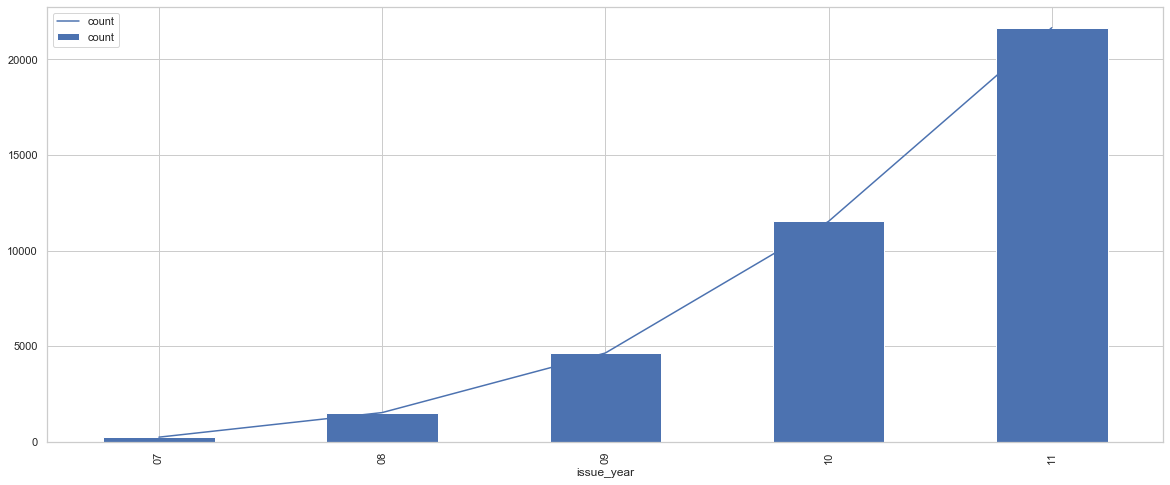

In [291]:
# Yearly basis loan distribution
loan_data['issue_month'],loan_data['issue_year'] = loan_data['issue_d'].str.split('-', 1).str
print(loan_data[['issue_d','issue_month','issue_year']].head())
yearly_basis = loan_data.groupby(by= [loan_data.issue_year])[['loan_status']].count()
yearly_basis.rename(columns={"loan_status": "count"},inplace=True)
ax =yearly_basis.plot(figsize=(20,8))
yearly_basis.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

Percentage of people applying for loan are increasing over years

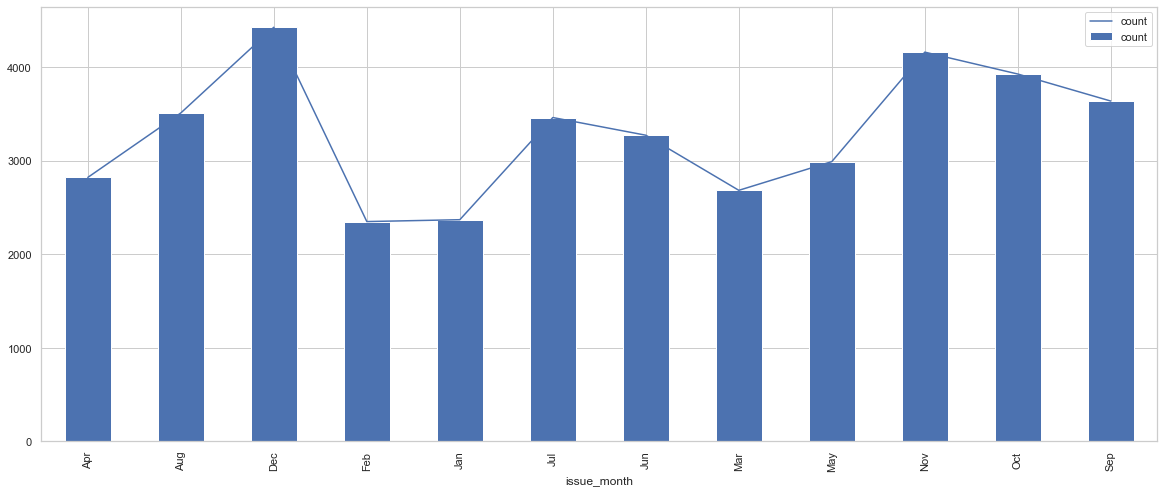

In [292]:
# Monthly basis loan distribution
monthly_basis = loan_data.groupby(by= [loan_data.issue_month])[['loan_status']].count()
monthly_basis.rename(columns={"loan_status": "count"},inplace=True)
ax = monthly_basis.plot(figsize=(20,8))
monthly_basis.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

Number of applicants applying for loan are higher in the year end (dec and nov) than other months of the year. 

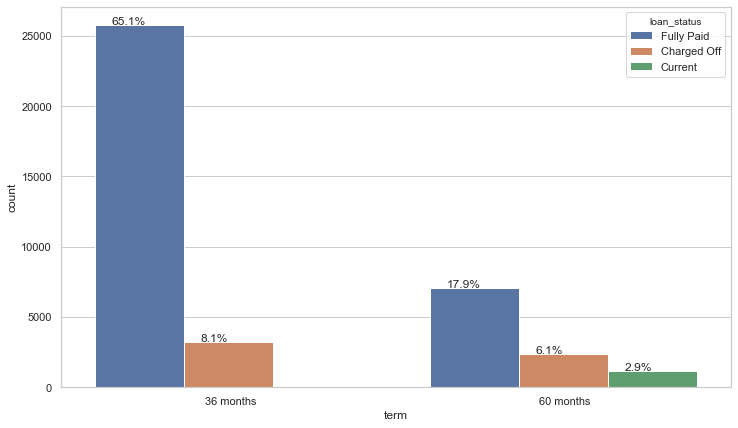

In [293]:
# Loan term in 36 months and 60 months period
categorical_variable(df=loan_data, col='term', hue='loan_status')

There are higher chances of loan recovery for the people who have taken loan with 36 months 

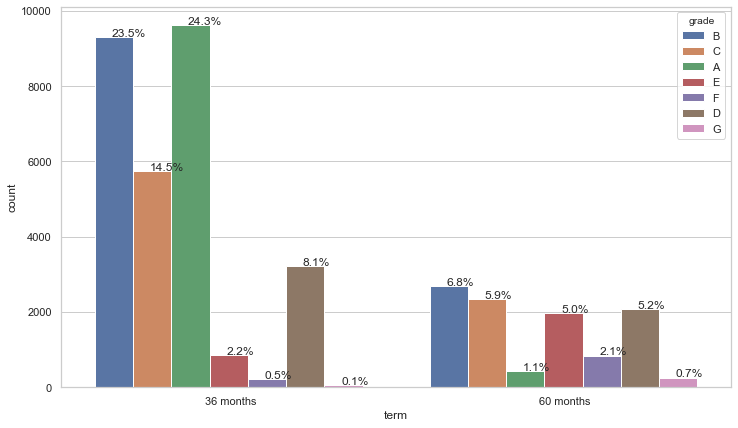

In [294]:
# Grade
categorical_variable(df=loan_data, col='term', hue='grade')

Most approved loans have high grade

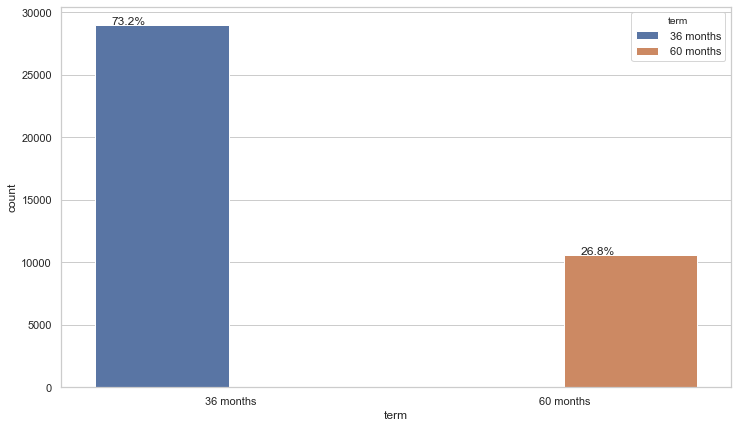

In [295]:
# Loan term
categorical_variable(df=loan_data, col='term', hue='term')

Most loans are for 36 months term


#### Continuous Variables

Check measures of central tendencies mean, median, and mode, check min and max values
and quantiles of each feature. These are measured using various statistical matrics visualization
methods such a Histogram, Boxplot etc.


In [296]:
# UDF to plot continous variables
def continuous_variables(df, col, hue=None):

    sns.set(style="whitegrid")

    fig, ax=plt.subplots(nrows =1, ncols=2, figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[col], ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data=df, x=col, ax=ax[1], orient='v')

    plt.show()

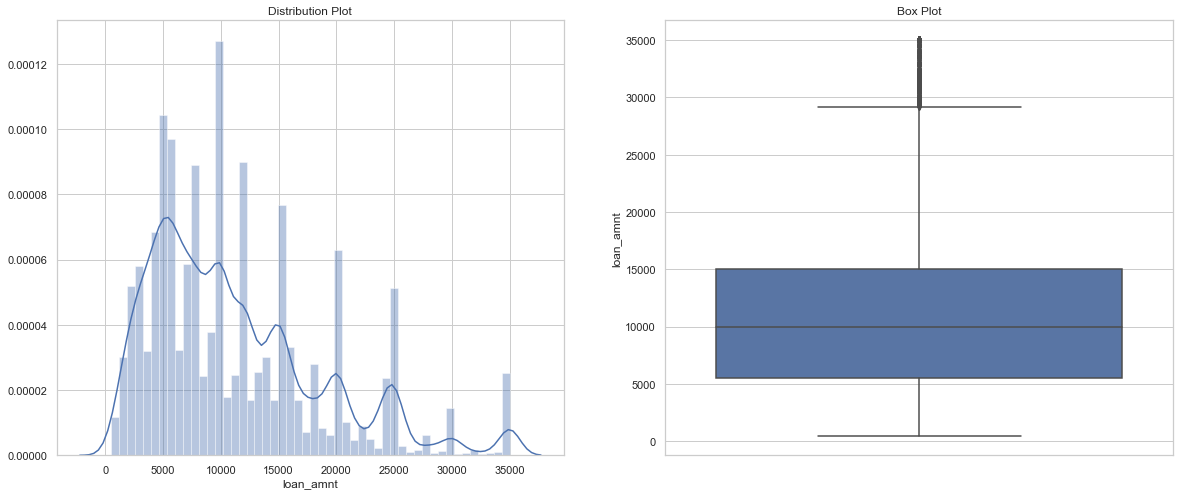

In [297]:
# Loan Amount
continuous_variables(df=loan_data, col='loan_amnt')

Most loans taken is between 6000 to 15000 USD

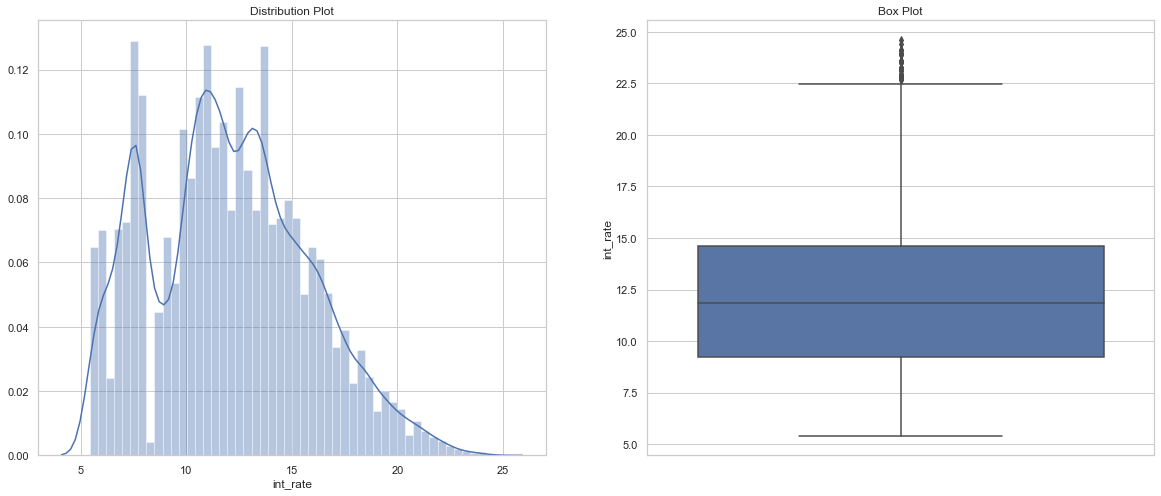

In [298]:
# Loan interest
continuous_variables(df=loan_data, col='int_rate')

highest distribution of interest is between 8 % to 14 %

In [299]:
# Annual Income variables
loan_data['annual_inc'] = loan_data['annual_inc'].apply(pd.to_numeric)
print(loan_data["annual_inc"].describe())

count    3.961600e+04
mean     6.896224e+04
std      6.379013e+04
min      4.000000e+03
25%      4.044900e+04
50%      5.900000e+04
75%      8.229700e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


The annual income reported by the borrowers range from min of 4,000 to max of 6,000,000.

Median annual income is around 60,000

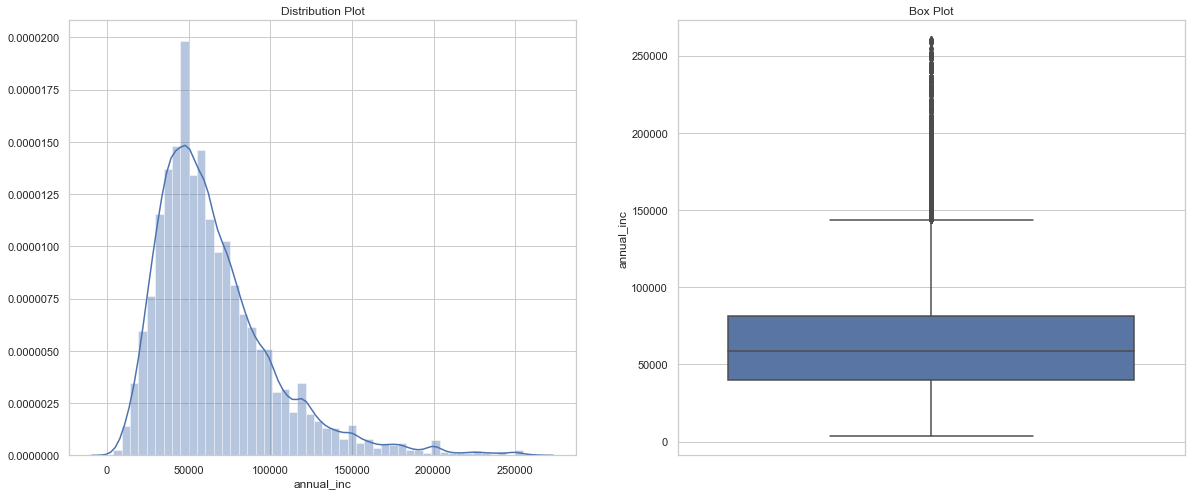

In [300]:
# Remove the outliers to analyze the annula income
loan_data = loan_data[np.abs(loan_data['annual_inc'] - loan_data['annual_inc'].mean()) <= (3 * loan_data['annual_inc'].std())]

# plot annual income
continuous_variables(df=loan_data, col='annual_inc')

Most applicants income is between 35k to 80k

## Bivariate analysis

Bivariate Analysis finds out the relationship between two variables.
Here, we look for association and disassociation between variables at a pre-defined significance level.

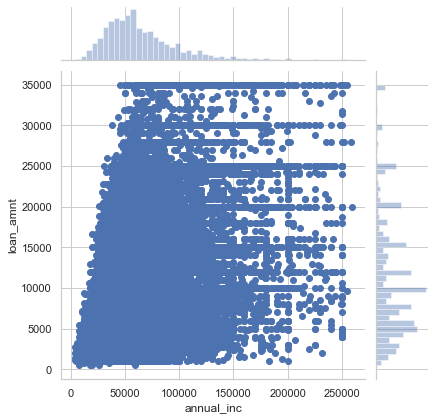

In [301]:
# Loan amount and Annual Income
sns.jointplot('annual_inc', 'loan_amnt', loan_data.loc[loan_data['annual_inc']<260000])
plt.show()

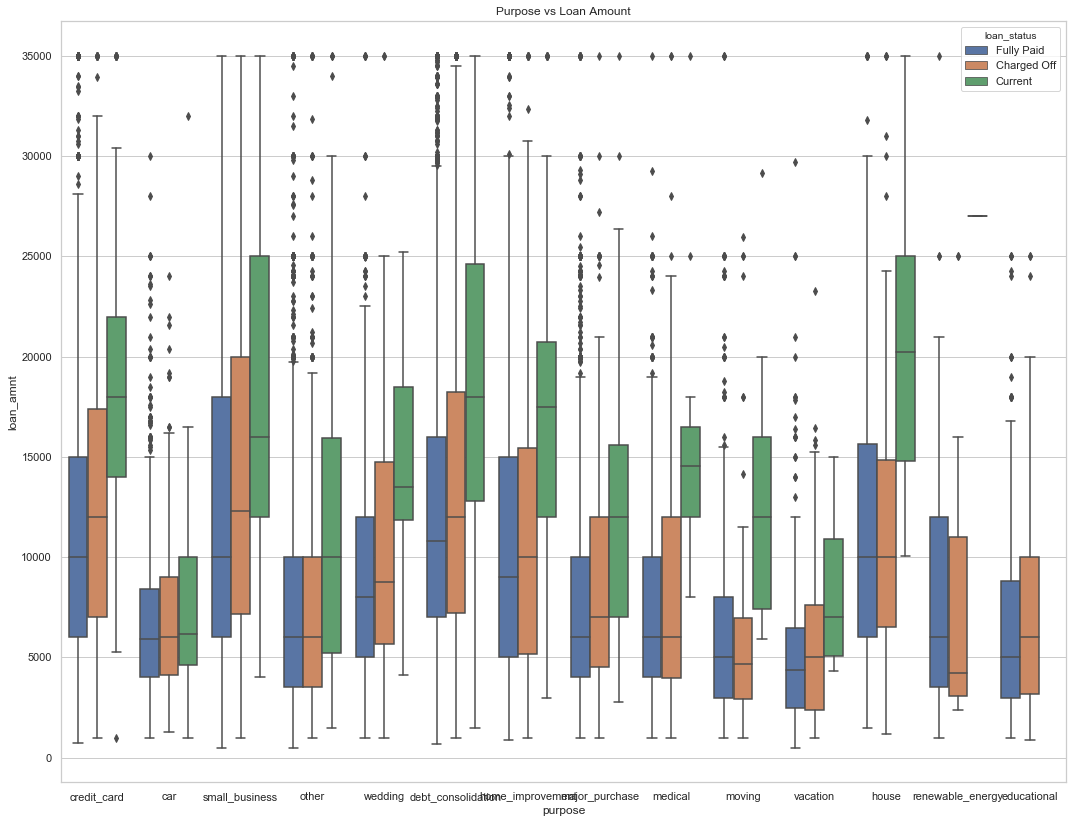

In [302]:
# Purpose of Loan vs Loan Amount for each Loan Status
plt.figure(figsize=(18,14))
sns.boxplot(data =loan_data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose vs Loan Amount')
plt.show()

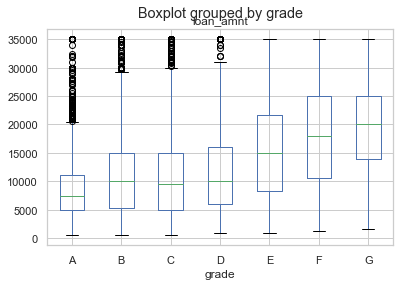

In [303]:
# Loan amount vs grade
# Larger loans generally appear to be given a lower grade


loan_data.boxplot(column='loan_amnt', by='grade')
plt.show()

                         loan_amnt  funded_amnt_inv  int_rate  installment  \
loan_amnt                 1.000000         0.940335  0.307338     0.929972   
funded_amnt_inv           0.940335         1.000000  0.305359     0.905059   
int_rate                  0.307338         0.305359  1.000000     0.281207   
installment               0.929972         0.905059  0.281207     1.000000   
annual_inc                0.416602         0.394796  0.075584     0.415204   
dti                       0.073741         0.081271  0.113671     0.061742   
total_pymnt               0.885638         0.880192  0.306288     0.855856   
total_rec_late_fee        0.044868         0.027340  0.093817     0.056432   
collection_recovery_fee   0.072659         0.060892  0.067335     0.074885   

                         annual_inc       dti  total_pymnt  \
loan_amnt                  0.416602  0.073741     0.885638   
funded_amnt_inv            0.394796  0.081271     0.880192   
int_rate                   0.0755

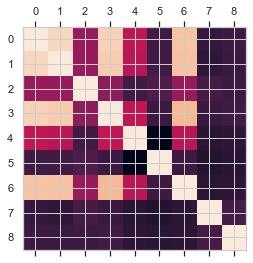

In [304]:
# Correlation Matrix : All Continuos integer variables
loan_corr = loan_data.corr()
print(loan_corr)
plt.matshow(loan_corr)
plt.show()

It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv'
are closely interrelated.So we can take any one column out of them for our analysis.

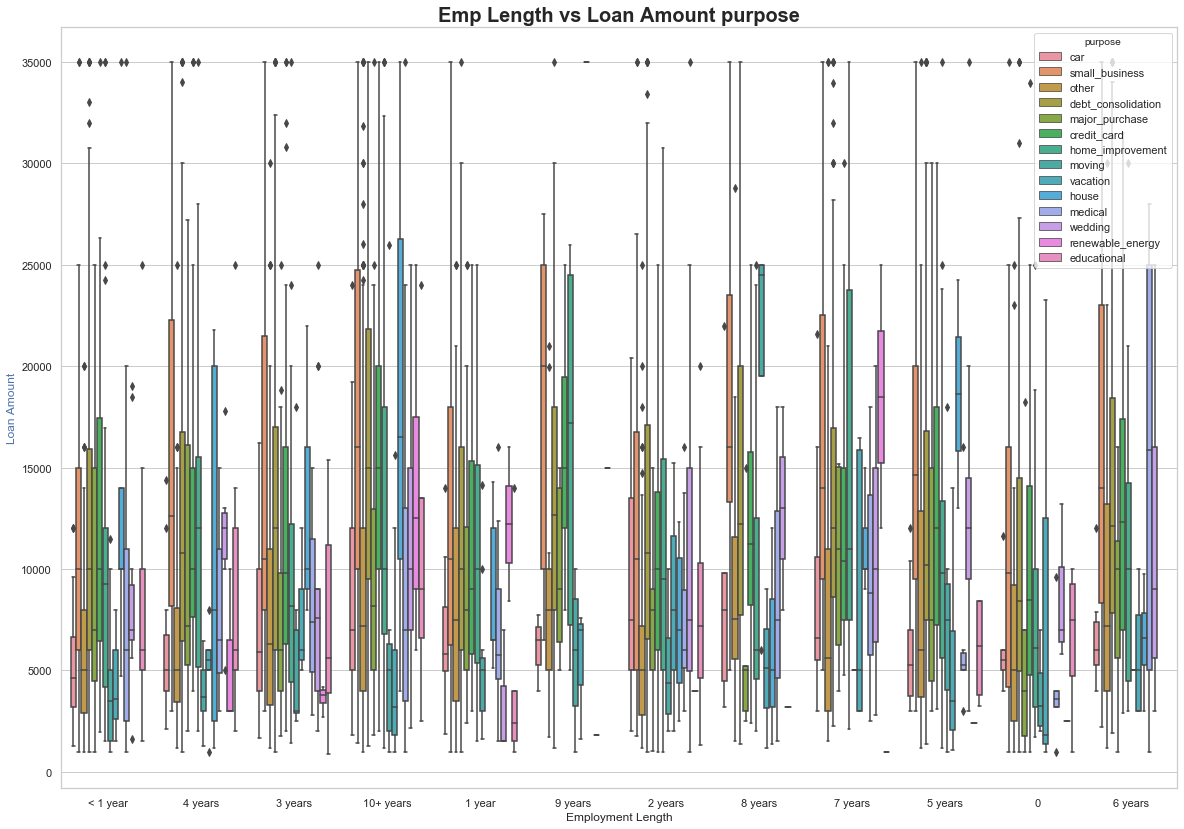

In [305]:
# Employment Length vs Loan Amount for different pupose of Loan
loan_status = loan_data.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',
                aggfunc=('count')).reset_index()
loan_status = loan_data.loc[loan_data['loan_status']=='Charged Off']

ax = plt.figure(figsize=(20, 14))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loan_status)
ax.set_title('Emp Length vs Loan Amount purpose',fontsize=20,weight="bold")
ax.set_xlabel('Employment Length',fontsize=12)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=12)
plt.show()

In [306]:
# Probability of Charged off Analysis.

# These the user defined function. 
def crosstab_udf(df, col_name):
    """ will be used to get the summarized table for each column(passed as a variable)
    along with probability of charge off w.r.t that column.
    """
    crosstab = pd.crosstab(df[col_name], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

def bivariate_prob_udf(df, col_name, stacked=True):
    """ function to count values in the column stacked with loan status
        and chances of 'default'.
    """
    
    plotCrosstab = crosstab_udf(df, col_name)

    linePlot = plotCrosstab[['Probability_Charged Off']]
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col_name].name.title()+' vs Probability Charged Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col_name].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status  Charged Off  Current  Fully Paid   All  Probability_Charged Off
addr_state                                                                  
NJ                   277       59        1493  1829                    0.151
NM                    30        5         151   186                    0.161
NV                   107       17         368   492                    0.217
NY                   489      113        3167  3769                    0.130
OH                   153       45        1019  1217                    0.126
OK                    40       12         246   298                    0.134
OR                    71       16         363   450                    0.158
PA                   177       49        1283  1509                    0.117
RI                    25        4         166   195                    0.128
SC                    66       13         390   469                    0.141
SD                    12        2          50    64                    0.188

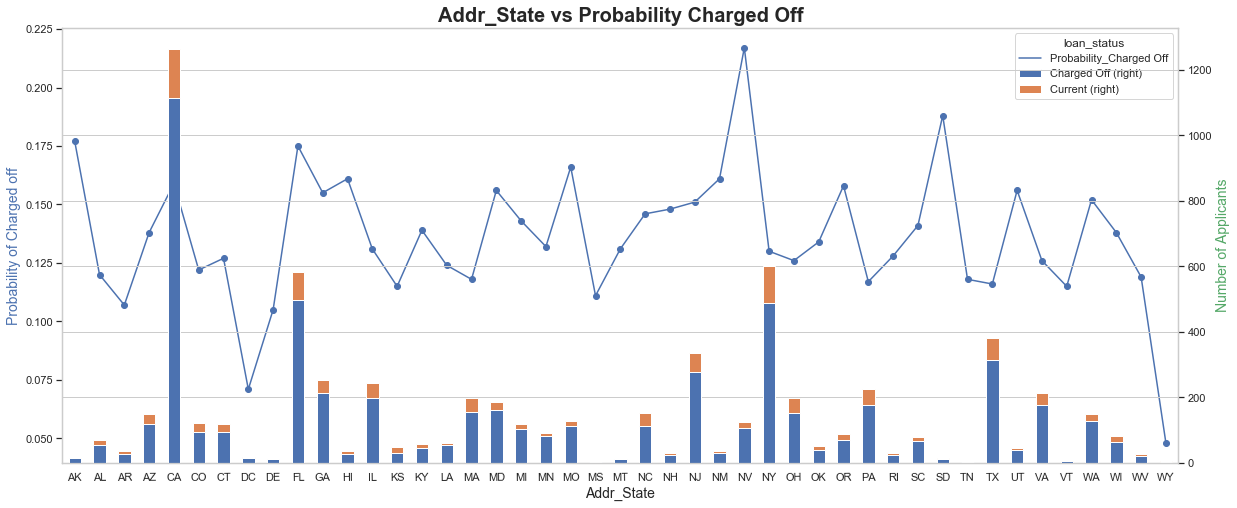

In [307]:
# Location vs probability of Charged off
filter_states = loan_data['addr_state'].value_counts()
filter_states = filter_states[(filter_states < 10)]
loan_filter_states = loan_data.drop(labels = loan_data[loan_data.addr_state.isin(filter_states.index)].index)
states = crosstab_udf(loan_filter_states,'addr_state')
print(states.tail(20))
bivariate_prob_udf(df = loan_filter_states, col_name = 'addr_state')

There are many states which are probability of charged of, NV being the highest and SD being 2nd hieghest.

loan_status         Charged Off  Current  Fully Paid    All  \
purpose                                                       
car                         159       50        1336   1545   
credit_card                 538      103        4448   5089   
debt_consolidation         2750      582       15162  18494   
educational                  56        0         265    321   
home_improvement            339       98        2468   2905   
house                        58       14         301    373   
major_purchase              220       37        1908   2165   
medical                     106       12         566    684   
moving                       90        7         480    577   
other                       628      127        3201   3956   
renewable_energy             19        1          81    101   
small_business              469       74        1257   1800   
vacation                     53        6         322    381   
wedding                      94       20         823   

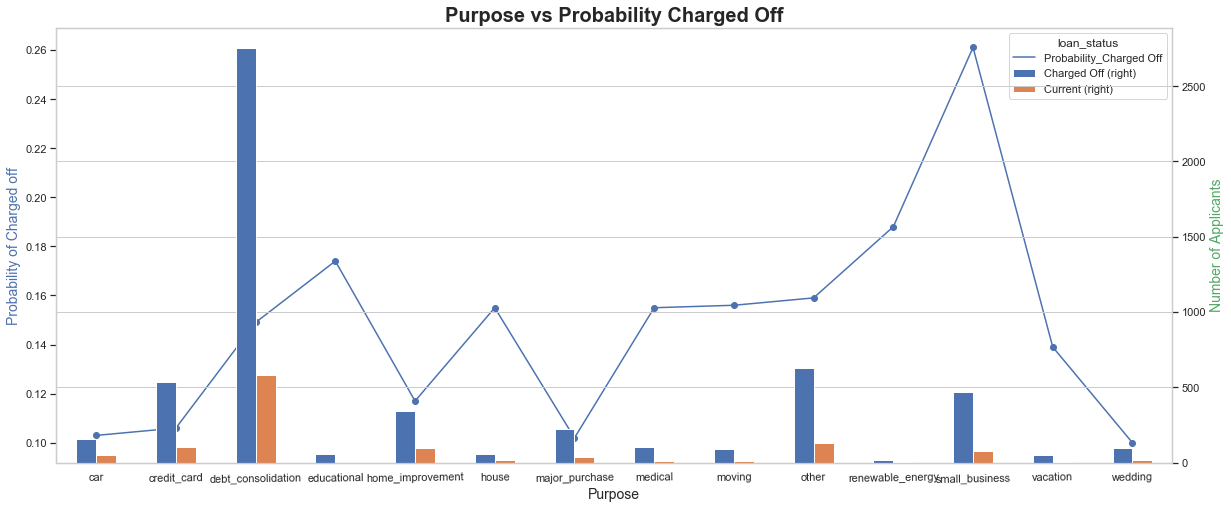

In [308]:
# Loan purpose and probability of charged Offpurpose = crosstab(loan,'purpose')
purpose = crosstab_udf(loan_data,'purpose')
print(purpose)
bivariate_prob_udf(df=loan_data, col_name='purpose', stacked=False)

If the loan is taken for small business purpose, there is higher chances of charged of. Wedding being the lowest.

loan_status       Charged Off  Current  Fully Paid    All  \
annual_inc_range                                            
0-25000                   487       26        2056   2569   
25000-50000              2119      329       10687  13135   
50000-75000              1679      359        9959   6240   
75000-100000              733      220        5287  11997   
100000 and above          561      197        4629   5387   

loan_status       Probability_Charged Off  
annual_inc_range                           
0-25000                             0.190  
25000-50000                         0.161  
50000-75000                         0.269  
75000-100000                        0.061  
100000 and above                    0.104  


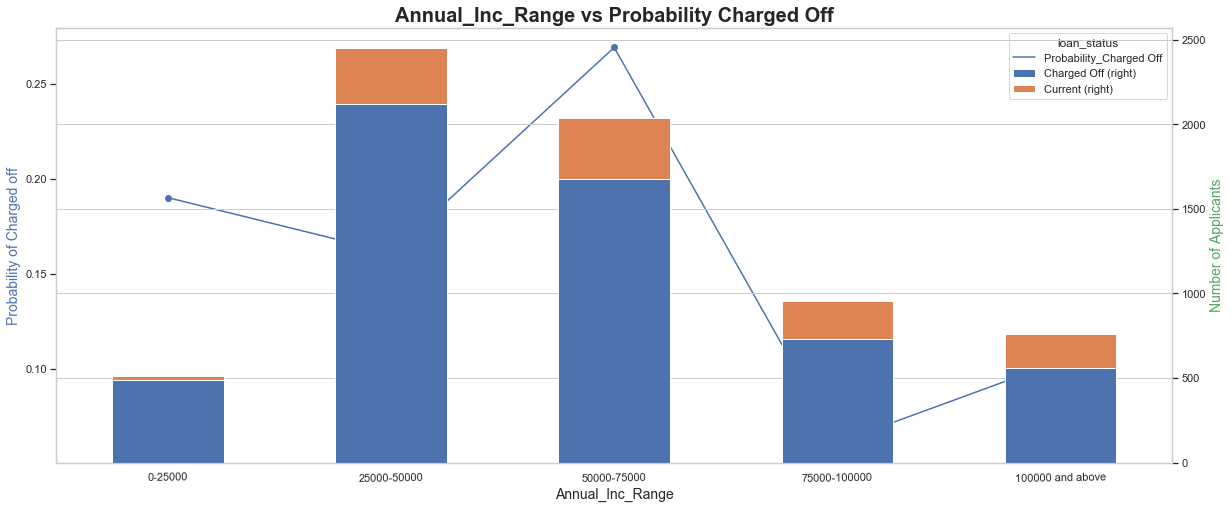

In [309]:
# Annual income range vs Probability of charged Off
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], bins, labels=slot)
annual_inc_range = crosstab_udf(loan_data,'annual_inc_range')
print(annual_inc_range)
bivariate_prob_udf(df=loan_data, col_name ='annual_inc_range')

If there is higher annual income there is less probability of being charged off (default)

loan_status      Charged Off  Current  Fully Paid    All  \
loan_amnt_range                                            
0-5000                  1309       96        8115   9520   
5000-10000              1635      158       11082  12875   
10000-15000             1046      302        6579   7927   
15000-20000              739      239        3555   1546   
20000-25000              534      161        2232   4533   
25000 and above          316      175        1055   2927   

loan_status      Probability_Charged Off  
loan_amnt_range                           
0-5000                             0.138  
5000-10000                         0.127  
10000-15000                        0.132  
15000-20000                        0.478  
20000-25000                        0.118  
25000 and above                    0.108  


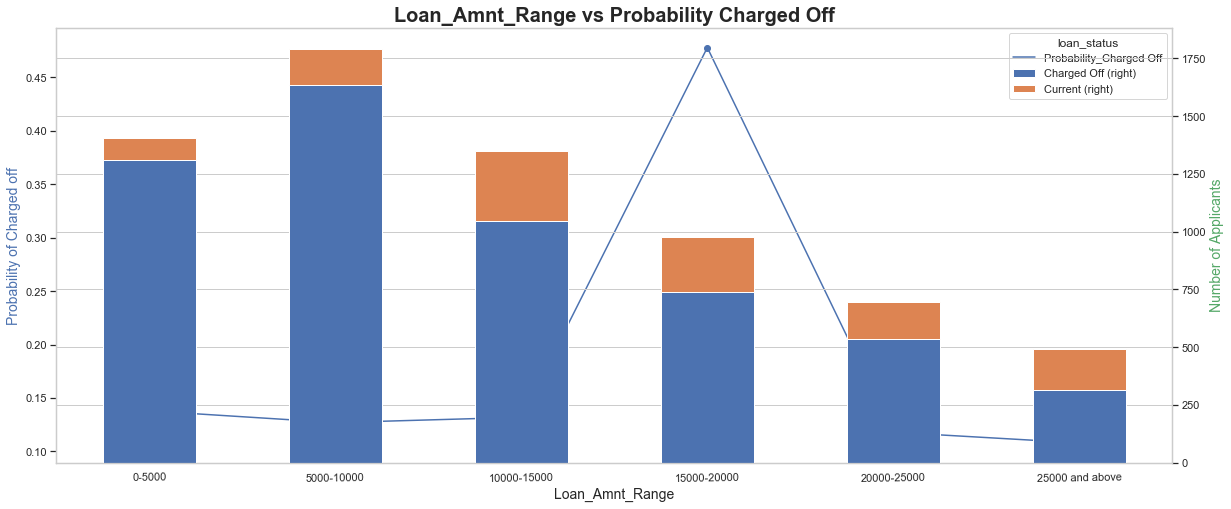

In [310]:
# Loan amount range vs probability charged off
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], bins, labels=slot)
loan_amnt_range = crosstab_udf(loan_data,'loan_amnt_range')
print(loan_amnt_range)
bivariate_prob_udf(df=loan_data, col_name ='loan_amnt_range')

loan_status     Charged Off  Current  Fully Paid   All  \
int_rate_range                                           
0-7.5                   256        7        5095  7563   
7.5-10                  569       70        6309  9053   
10-12.5                1219      269        8068  5358   
12.5-15                1469      257        7327  9556   
15 and above           1775      427        5361  6948   

loan_status     Probability_Charged Off  
int_rate_range                           
0-7.5                             0.034  
7.5-10                            0.063  
10-12.5                           0.228  
12.5-15                           0.154  
15 and above                      0.255  


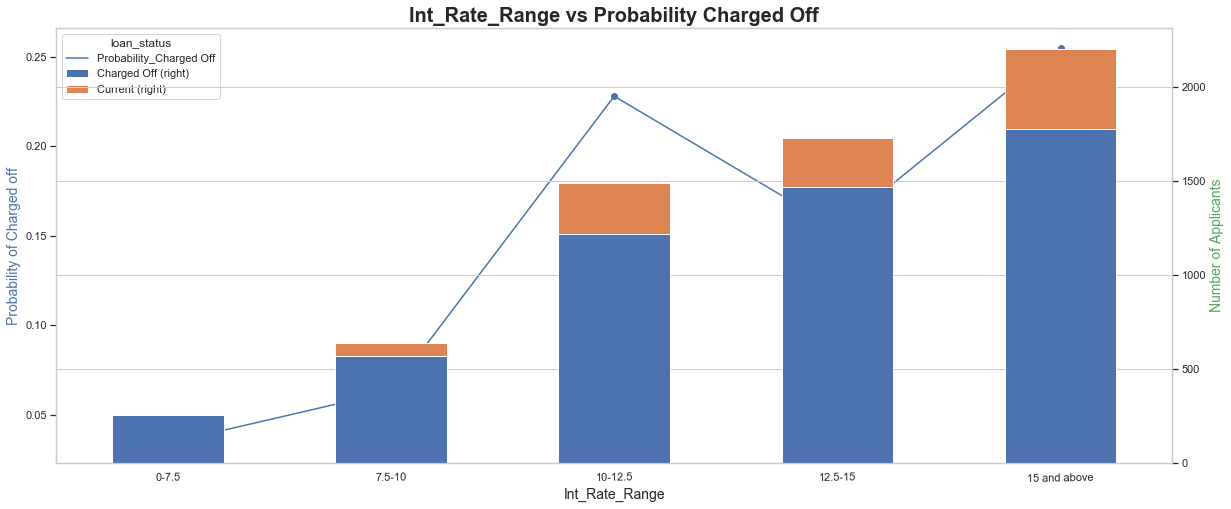

In [311]:
# Interest rate range vs Probability charged off
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins, labels=slot)
int_rate_range = crosstab_udf(loan_data,'int_rate_range')
print(int_rate_range)
bivariate_prob_udf(df =loan_data, col_name ='int_rate_range')

Probability of charged if the interest is high is 15 % and above. 


# VERDICT

Considered 'Loan Status' as target variable.

And some of the important variables to analyse loan predictions are 'Purpose', 'Grade', 'EMP Length', 'Interest Rate', 'Term' and 'Loan Amount' 